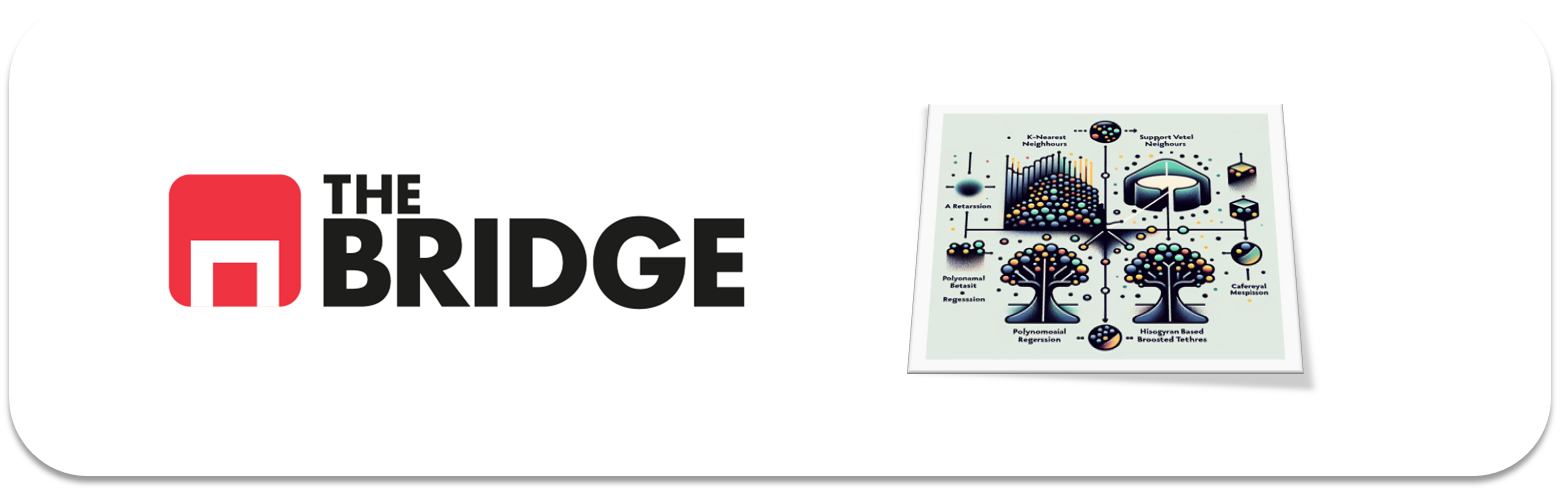

## PRACTICA OBLIGATORIA: **Otros Modelos Supervisados**

* La práctica obligatoria de esta unidad consiste en resolver un modelado de clasificación, incluyendo KNN entre los posibles modelos, y aplicando balanceado. Para ello utilizaremos un dataset que ya hemos empleado en los workout. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report



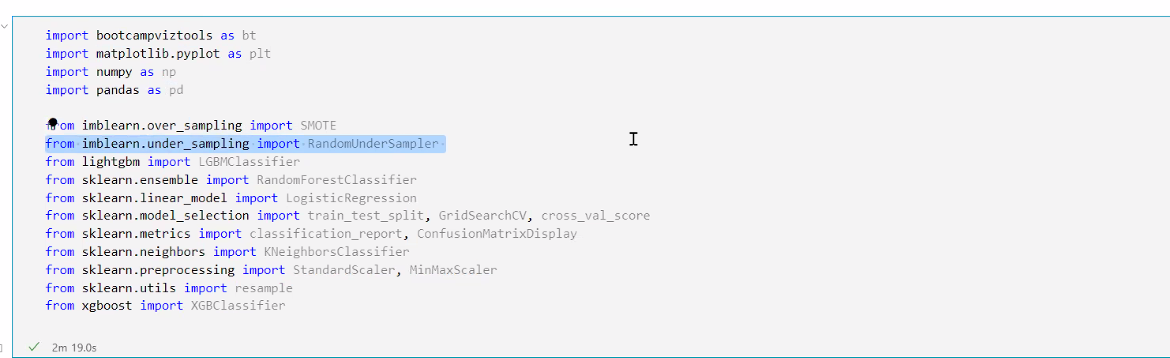

### #1. El problema y los datos

Vamos a volver al dataset con el que vimos la clasificación binaria con regresión logística, "Give me some credit", y nuestro objetivo es crear un modelo que nos permita predicir si una persona va a encontrarse en dificultades financieras en los dos próximos años. El dataset de partida lo puedes en contrar en el directorio data que acompaña al ejercicio. 

### #1.1
Cárgalo y, apoyándote en las herramientas y fuentes que consideres necesarias, haz una descripción textual de sus variables. Luego con ayuda de los datos, haz una clasificación inicial de sus variables en categóricas y numéricas.

In [3]:
df = pd.read_csv('./data/credit_npo.csv')

In [4]:
df

SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0                     0                              0.081892   37   
1                     0                              0.023413   74   
2                     0                              0.000000   43   
3                     0                              0.492754   44   
4                     0                              1.000000   63   
...                 ...                                   ...  ...   
12532                 0                              0.197116   59   
12533                 0                              0.036726   62   
12534                 0                              0.120313   49   
12535                 0                              0.252566   63   
12536                 0                              0.000000   40   

       NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0                                         0   0.070709         5656.0   
1                                         0   0.209197         4870.0   
2                                         0   0.080784         5000.0   
3                                         0   0.412735         7333.0   
4                                         0   0.000000         8333.0   
...                                     ...        ...            ...   
12532                                     0   0.290216         5140.0   
12533                                     0   0.884985         5833.0   
12534                                     0   0.577676         6333.0   
12535                                     0   0.037640        14000.0   
12536                                     0   0.455357         3583.0   

       NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                                   12                        1   
1                                    9                        0   
2                                    2                        0   
3                                    4                        0   
4                                    3                        0   
...                                ...                      ...   
12532                                6                        0   
12533                               12                        0   
12534                                7                        0   
12535                                9                        0   
12536                                7                        0   

       NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
0                                 0                                     0   
1                                 1                                     0   
2                                 0                                     0   
3                                 2                                     0   
4                                 0                                     0   
...                             ...                                   ...   
12532                             1                                     0   
12533                             1                                     0   
12534                             2                                     0   
12535                             0                                     0   
12536                             2                                     0   

       NumberOfDependents  
0                     0.0  
1                     0.0  
2                     2.0  
3                     3.0  
4                     1.0  
...                   ...  
12532                 0.0  
12533                 0.0  
12534                 2.0  
12535                 1.0  
12536                 1.0  

[12537 rows x 11 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [6]:
df.dropna(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11816 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      11816 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  11816 non-null  float64
 2   age                                   11816 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  11816 non-null  int64  
 4   DebtRatio                             11816 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       11816 non-null  int64  
 7   NumberOfTimes90DaysLate               11816 non-null  int64  
 8   NumberRealEstateLoansOrLines          11816 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  11816 non-null  int64  
 10  NumberOfDependents                    11816 non-null  float64
dtypes: float64(4), int64

* **SeriousDlqin2yrs**: Indica si la persona ha experimentado dificultades financieras en los últimos dos años. Es una variable binaria que puede tomar los valores 0 o 1, donde 0 indica que la persona no ha experimentado dificultades financieras y 1 indica lo contrario.
* **RevolvingUtilizationOfUnsecuredLines**: Proporción del saldo de crédito en relación con el límite de crédito. Esta es una variable numérica que representa un valor porcentual que puede variar entre 0 y 1.
* **age**: Edad del solicitante. Esta es una variable numérica que representa la edad de la persona.
* **NumberOfTime30-59DaysPastDueNotWorse**: Número de veces que el solicitante ha retrasado el pago de 30-59 días en los últimos dos años. Esta es una variable numérica que representa el número de veces que se ha retrasado el pago en un intervalo de tiempo específico.
* **DebtRatio**: Relación deuda-ingresos. Esta es una variable numérica que representa la proporción entre la deuda total y los ingresos totales del solicitante.
* **MonthlyIncome**: Ingresos mensuales del solicitante. Esta es una variable numérica que representa el ingreso mensual del solicitante en dólares.
* **NumberOfOpenCreditLinesAndLoans**: Número de líneas de crédito y préstamos abiertos. Esta es una variable numérica que representa la cantidad de líneas de crédito y préstamos que tiene el solicitante abiertos en el momento dado.
* **NumberOfTimes90DaysLate**: Número de veces que el solicitante ha retrasado el pago de 90 días o más en los últimos dos años. Esta es una variable numérica similar a la variable NumberOfTime30-59DaysPastDueNotWorse.
* **NumberRealEstateLoansOrLines**: Número de préstamos o líneas de crédito hipotecarias. Esta es una variable numérica que representa la cantidad de préstamos o líneas de crédito hipotecarias que tiene el solicitante.
* **NumberOfTime60-89DaysPastDueNotWorse**: Número de veces que el solicitante ha retrasado el pago de 60-89 días en los últimos dos años. Esta es una variable numérica similar a las variables NumberOfTime30-59DaysPastDueNotWorse y NumberOfTimes90DaysLate.
* **NumberOfDependents**: Número de dependientes del solicitante. Esta es una variable numérica que representa la cantidad de personas dependientes del solicitante.


#### **Variables categóricas:**
* SeriousDlqin2yrs (variable objetivo)

#### **Variables numéricas:**
* RevolvingUtilizationOfUnsecuredLines
* age
* NumberOfTime30-59DaysPastDueNotWorse
* DebtRatio
* MonthlyIncome
* NumberOfOpenCreditLinesAndLoans
* NumberOfTimes90DaysLate
* NumberRealEstateLoansOrLines
* NumberOfTime60-89DaysPastDueNotWorse
* NumberOfDependents

In [8]:
df.describe()

SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines           age  \
count      11816.000000                          11816.000000  11816.000000   
mean           0.070244                              0.335668     51.447698   
std            0.255568                              0.365209     14.516270   
min            0.000000                              0.000000     21.000000   
25%            0.000000                              0.034927     41.000000   
50%            0.000000                              0.179183     51.000000   
75%            0.000000                              0.587187     62.000000   
max            1.000000                              6.000000    101.000000   

       NumberOfTime30-59DaysPastDueNotWorse     DebtRatio  MonthlyIncome  \
count                          11816.000000  11816.000000   11816.000000   
mean                               0.340471      0.499708    6864.815420   
std                                2.927409      2.696067   11855.905437   
min                                0.000000      0.000000       0.000000   
25%                                0.000000      0.143456    3498.750000   
50%                                0.000000      0.294748    5416.000000   
75%                                0.000000      0.477414    8300.000000   
max                               98.000000     96.000000  702500.000000   

       NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
count                     11816.000000             11816.000000   
mean                          8.759140                 0.180010   
std                           5.129772                 2.892577   
min                           0.000000                 0.000000   
25%                           5.000000                 0.000000   
50%                           8.000000                 0.000000   
75%                          11.000000                 0.000000   
max                          49.000000                98.000000   

       NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
count                  11816.000000                          11816.000000   
mean                       1.059580                              0.149712   
std                        1.140716                              2.868248   
min                        0.000000                              0.000000   
25%                        0.000000                              0.000000   
50%                        1.000000                              0.000000   
75%                        2.000000                              0.000000   
max                       19.000000                             98.000000   

       NumberOfDependents  
count        11816.000000  
mean             0.856804  
std              1.147509  
min              0.000000  
25%              0.000000  
50%              0.000000  
75%              2.000000  
max             10.000000

### #1.2
¿Qué tipo de problema estamos tratando? ¿Cuál es la variable target?

*El tipo de problema que estamos tratando es un problema de **clasificación binaria**. En este caso, queremos predecir si una persona va a encontrarse en dificultades financieras en los dos próximos años o no. La variable objetivo, también conocida como variable target, es la columna "SeriousDlqin2yrs". Esta variable indica si la persona ha experimentado dificultades financieras en los últimos dos años y toma el valor de 1 si ha experimentado dificultades financieras y 0 si no las ha experimentado. Por lo tanto, nuestro objetivo es utilizar las demás variables del conjunto de datos para predecir este valor binario.*

In [14]:
target = "SeriousDlqin2yrs"

### #1.3
Pinta la distribución de frecuencias del target y coméntala

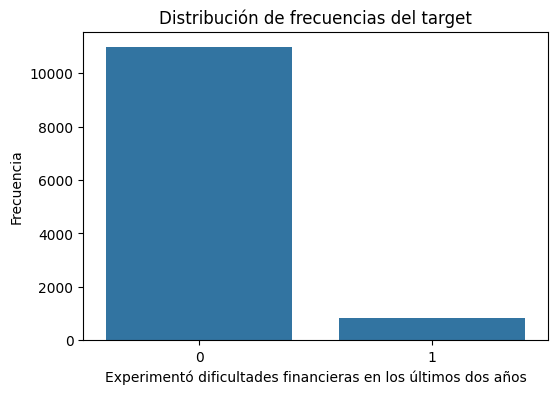

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(x='SeriousDlqin2yrs', data=df)
plt.title('Distribución de frecuencias del target')
plt.xlabel('Experimentó dificultades financieras en los últimos dos años')
plt.ylabel('Frecuencia')
plt.show()

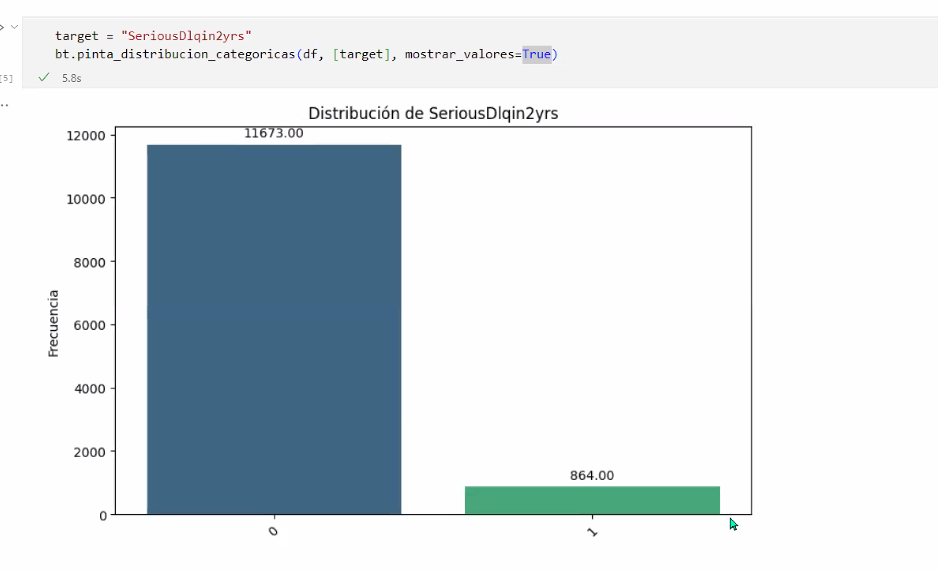

* Observamos que la mayoría de las personas en el conjunto de datos no han experimentado dificultades financieras en los últimos dos años, ya que la barra correspondiente al valor 0 es mucho más alta que la barra correspondiente al valor 1.
* Sin embargo, también podemos observar que hay una cantidad significativa de personas que sí han experimentado dificultades financieras en el último periodo.
* Esta distribución desigual entre las dos categorías del target indica que puede haber un desbalance de clases en el conjunto de datos, lo cual es importante tener en cuenta al desarrollar modelos de clasificación. Es posible que necesitemos aplicar técnicas de balanceo de clases para mejorar el rendimiento del modelo en la predicción de la clase minoritaria.


### #2 Modelado

Realiza un proceso completo de modelado hasta dar con el mejor modelo de los que hayas escogido (emplea al menos 3, y uno tiene que ser KNN). Aplica las técnicas que creas necesarias para obtener el mejor resultado (suponiendo que este después de hablar con el negocio es el recall medio, para tener un compromiso entre las dos clases). Para comparar modelos emplea validación cruzada antes de optimización y luego ajusta los hiperparámetros del mejor modelo. Evalúa este y haz un pequeño análisis de errores.

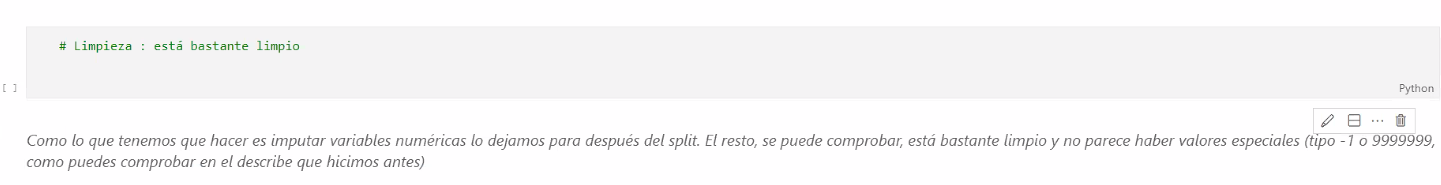

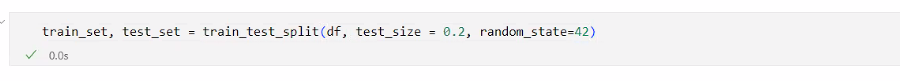

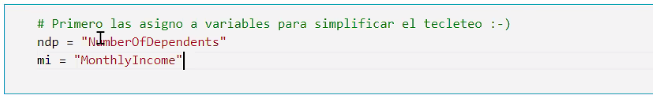

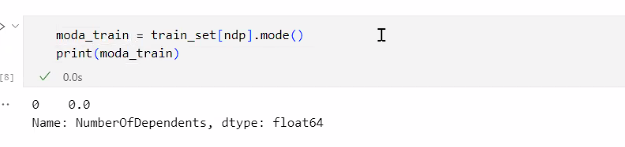

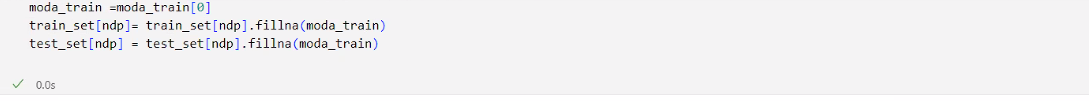

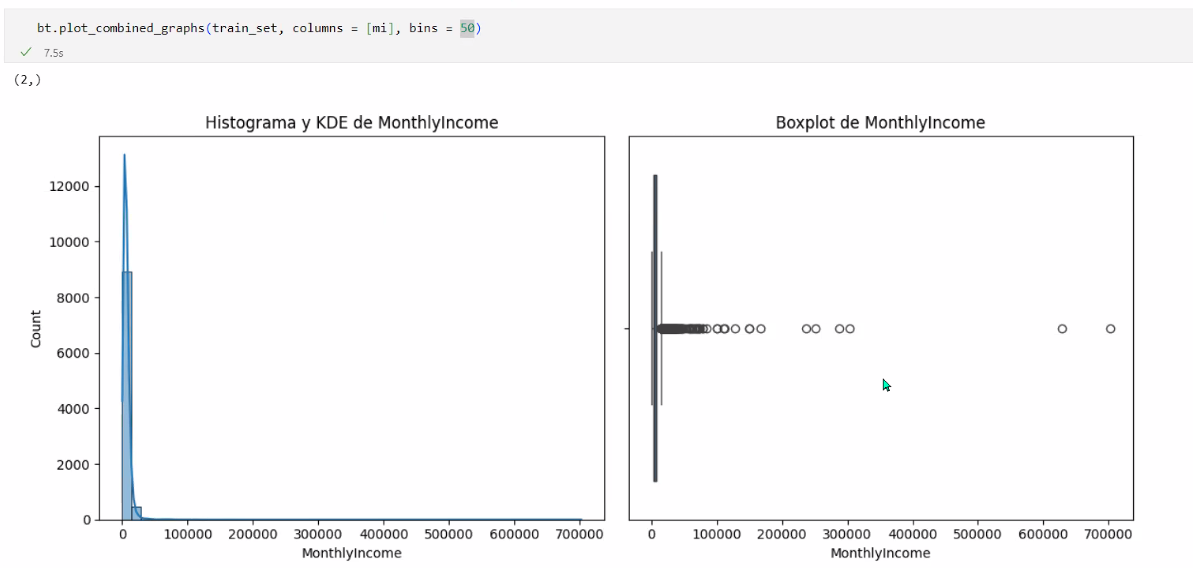

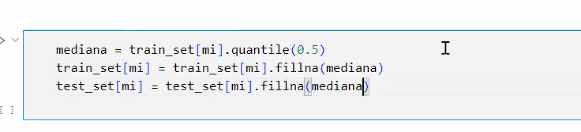

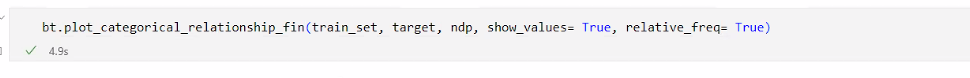

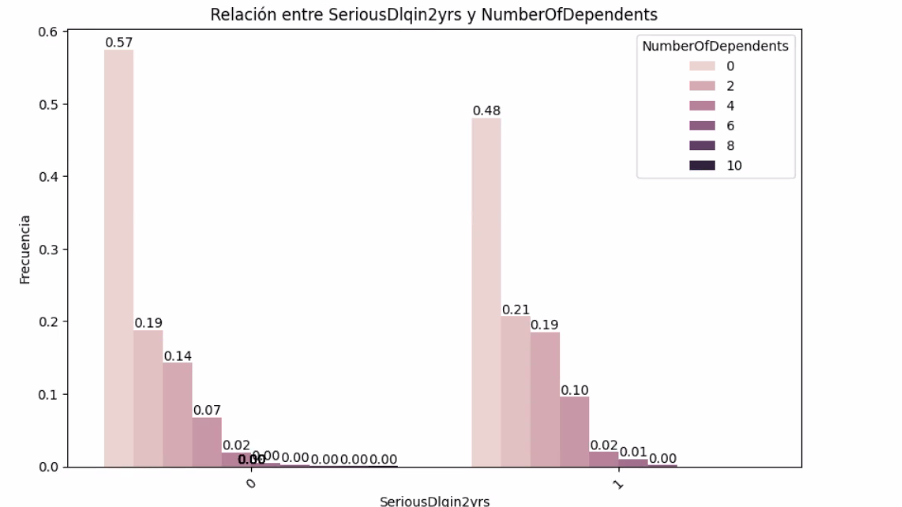

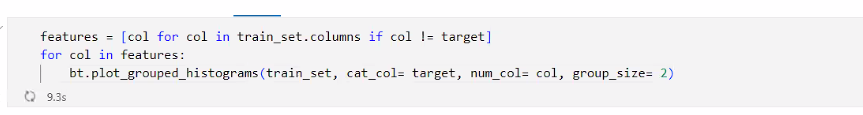

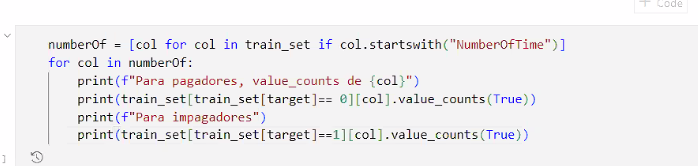

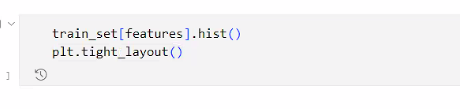

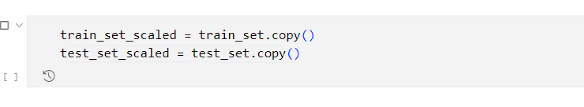

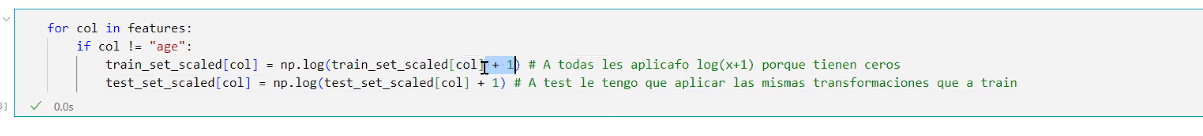

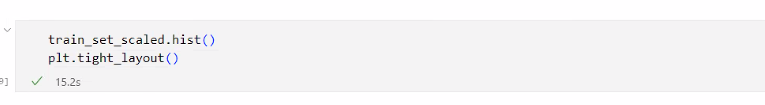

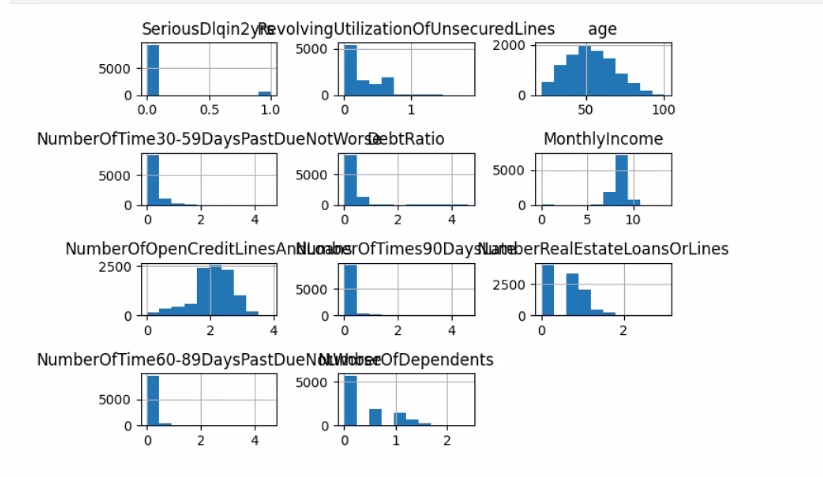

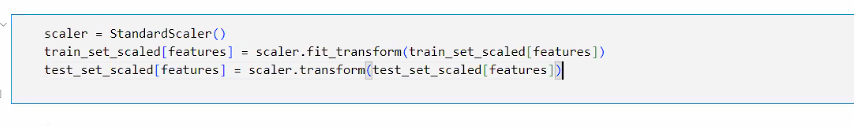

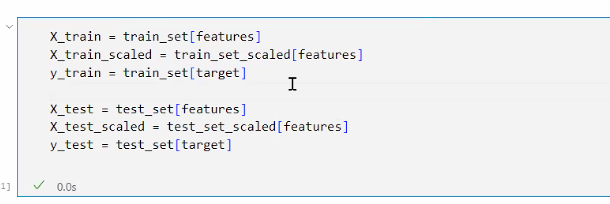

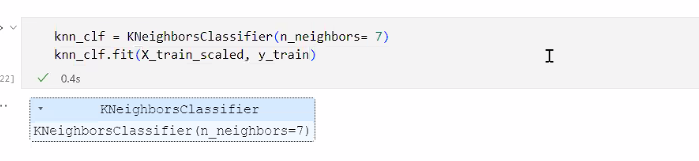

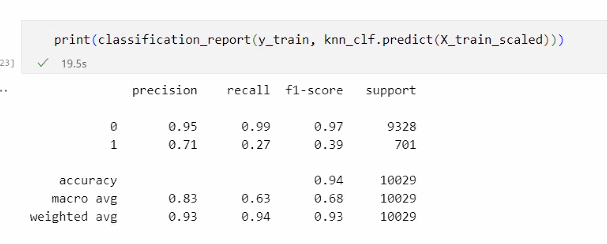

El F1 score es una métrica comúnmente utilizada en problemas de clasificación para evaluar el rendimiento de un modelo de machine learning. Es la media armónica de la precisión (precision) y el recall (recuperación o sensibilidad).

La precisión (precision) se define como la proporción de ejemplos positivos clasificados correctamente respecto al total de ejemplos clasificados como positivos por el modelo. Por otro lado, el recall (recuperación o sensibilidad) mide la proporción de ejemplos positivos clasificados correctamente respecto al total de ejemplos que realmente son positivos en el conjunto de datos.

El F1 score se calcula mediante la siguiente fórmula:

$$ F1 = \frac{2 \times \text{precision} \times \text{recall}}{\text{precision} + \text{recall}} $$
​
 

El F1 score alcanza su mejor valor en 1 (perfecta precisión y recall) y su peor valor en 0. Es útil cuando hay desigualdad entre las clases en los datos, ya que tiene en cuenta tanto falsos positivos como falsos negativos.

En resumen, el F1 score es una métrica que proporciona una visión equilibrada entre precisión y recall, lo que lo hace útil para evaluar el rendimiento de un clasificador en problemas de clasificación, especialmente cuando las clases están desbalanceadas.

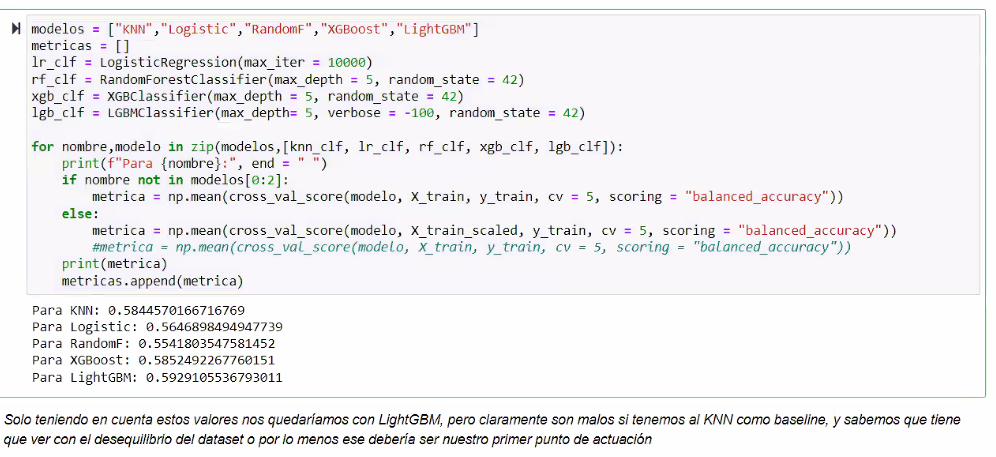

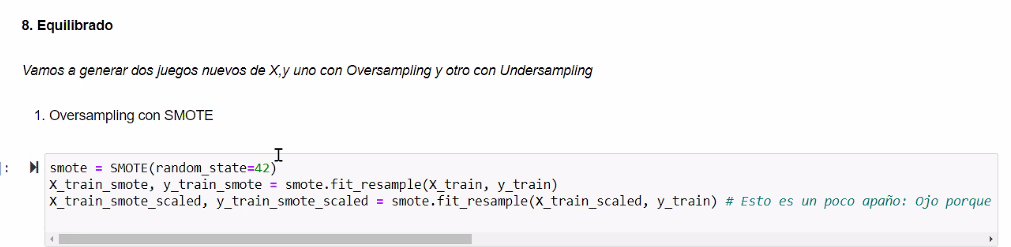

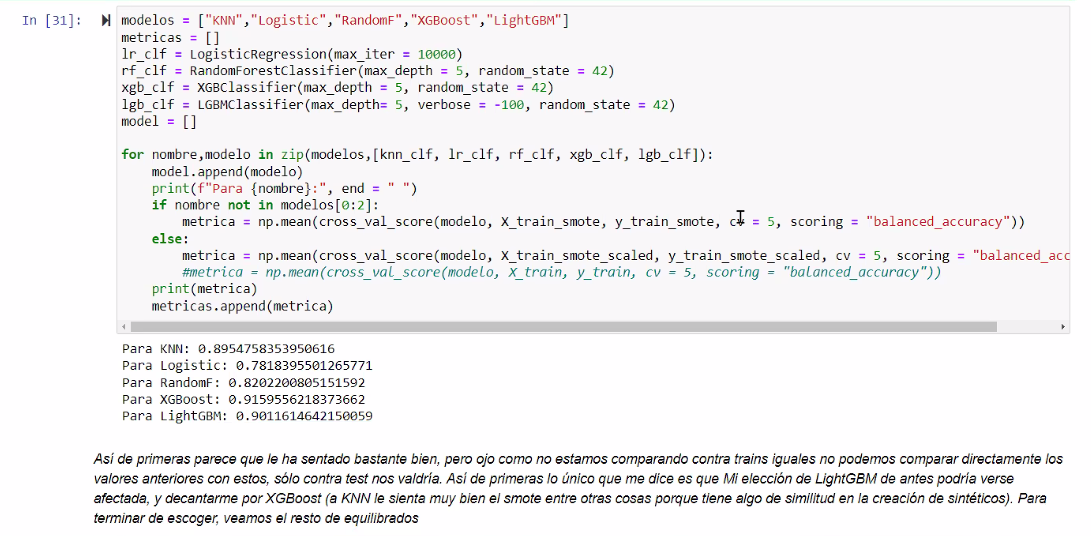

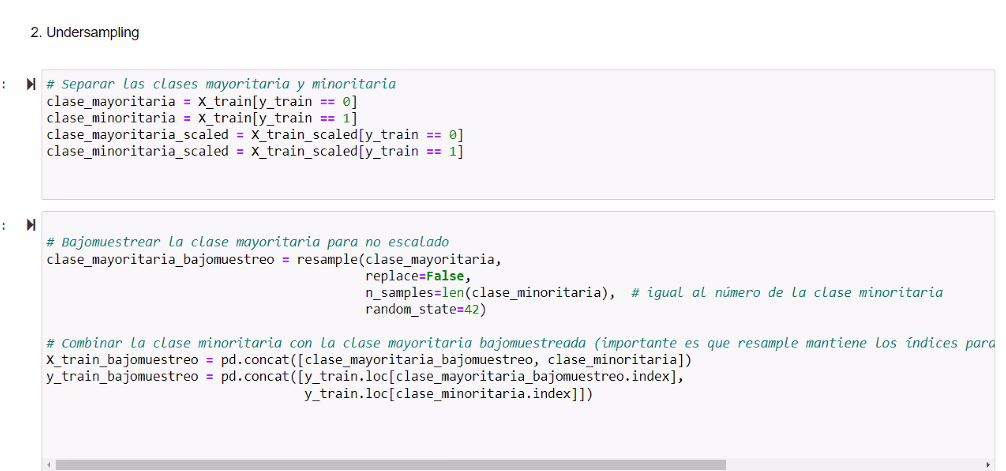

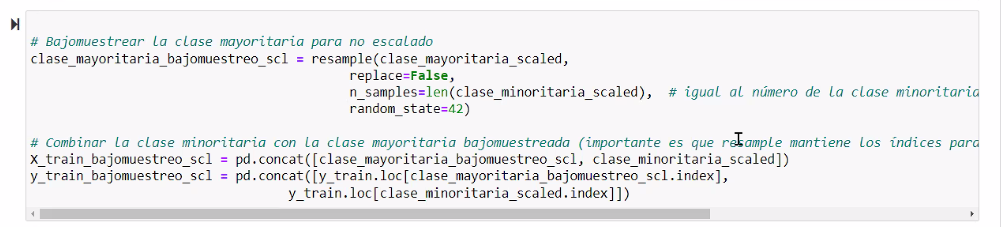

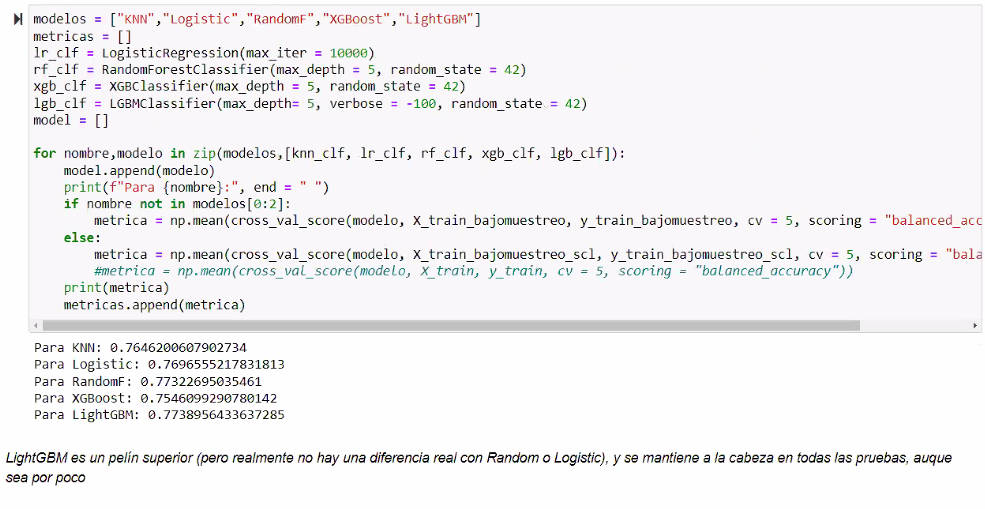

Classweight balanced

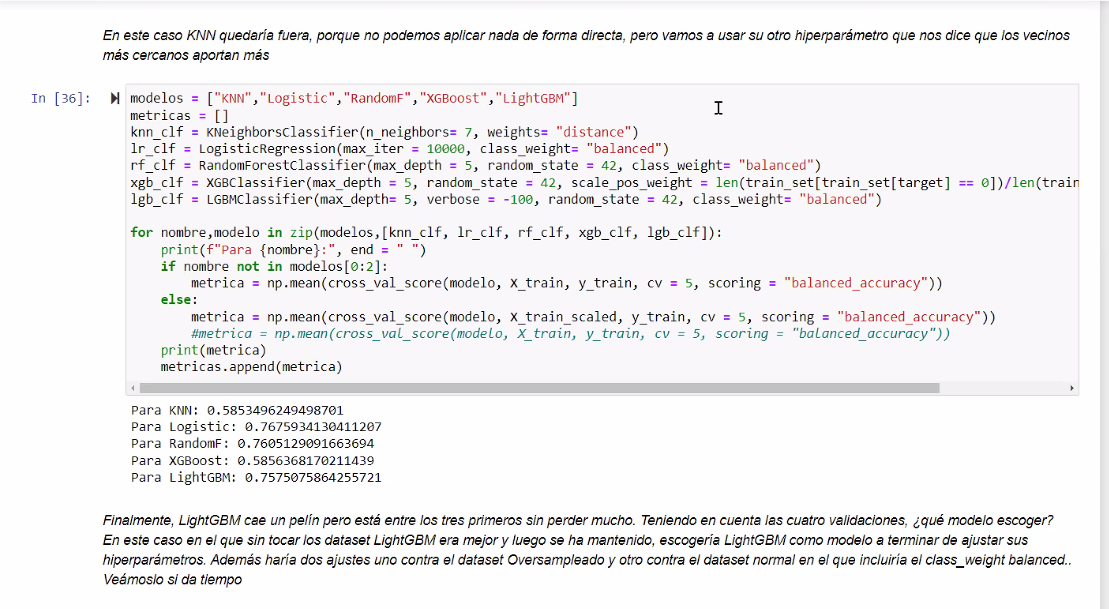

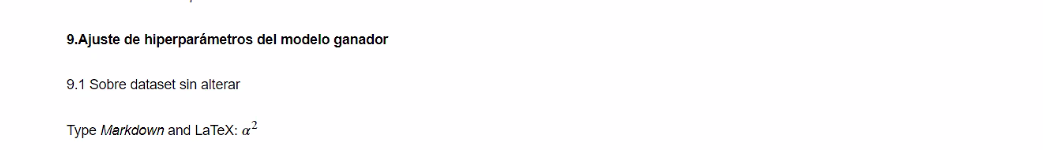

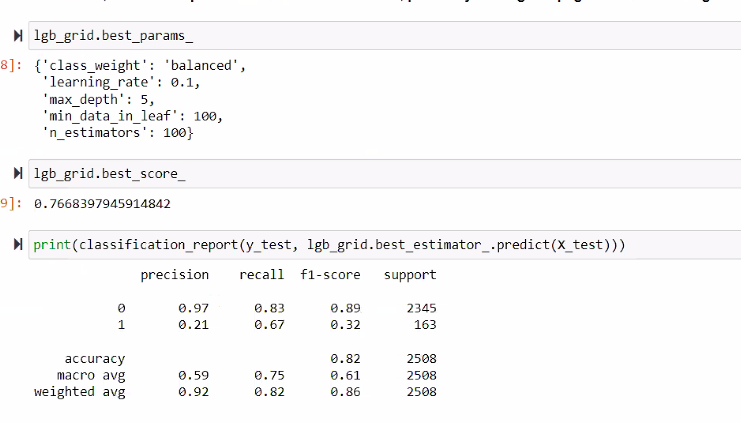

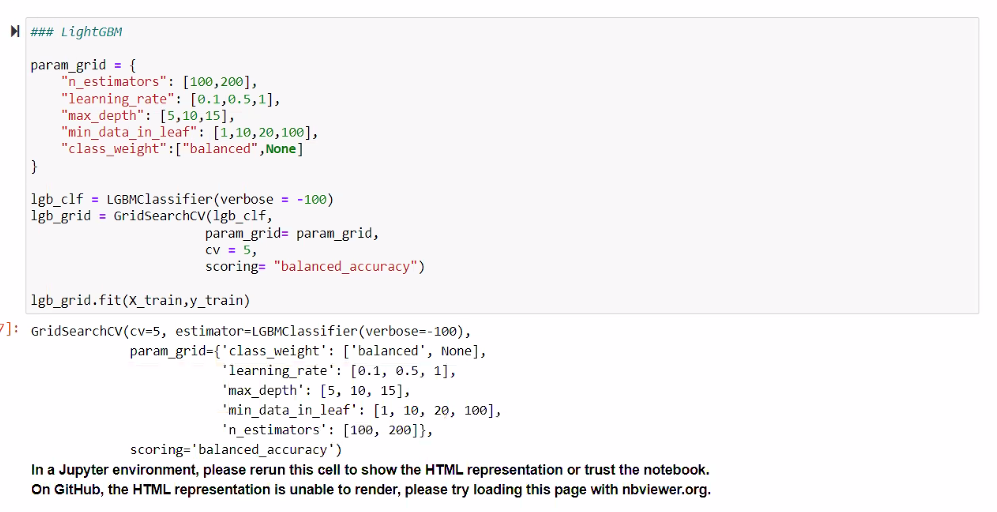

In [10]:
# Dividir los datos en características (X) y variable objetivo (y)
X = df.drop(columns=['SeriousDlqin2yrs'])
y = df['SeriousDlqin2yrs']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Inicializar los modelos
logistic_reg = LogisticRegression(max_iter=1000)
random_forest = RandomForestClassifier()
knn = KNeighborsClassifier()

# Realizar validación cruzada para evaluar el rendimiento de cada modelo
models = [logistic_reg, random_forest, knn]
for model in models:
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='recall')
    print(f"Recall medio para {type(model).__name__}: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})")

Recall medio para LogisticRegression: 0.09 (+/- 0.03)
Recall medio para RandomForestClassifier: 0.19 (+/- 0.09)
Recall medio para KNeighborsClassifier: 0.01 (+/- 0.01)


In [12]:
# Ajustar hiperparámetros para el modelo KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='recall', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_knn = grid_search.best_estimator_
print("Mejores hiperparámetros para KNN:", grid_search.best_params_)

Mejores hiperparámetros para KNN: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}


In [13]:
# Evaluar el mejor modelo (KNN) en el conjunto de prueba
y_pred = best_knn.predict(X_test)
print("Reporte de clasificación para KNN:")
print(classification_report(y_test, y_pred))

Reporte de clasificación para KNN:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96      2197
           1       0.17      0.04      0.07       167

    accuracy                           0.92      2364
   macro avg       0.55      0.51      0.51      2364
weighted avg       0.88      0.92      0.89      2364

